Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

## LOGISTIC REGRESSION

In [1]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

Remember that the probability of belonging to the class (*y*=1) is provided by the sigmoid function:

$$
g(z)=\frac{1}{1+e^{-z}}, \space where \space z=w^Tx
$$

$g(z) \in{[0,1]}$

Let's look at the sigmoid function closely:

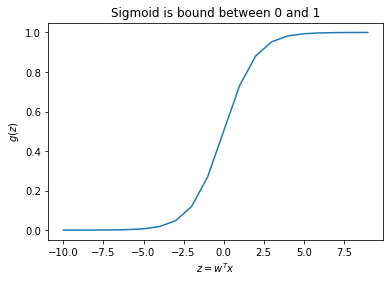

In [2]:
def sig(x):
    return 1/(1+np.exp(-x))

x = np.array(range(-10,10))
pyplot.plot(x, sig(x))
#pyplot.plot([0,0],[0,1], color='red', linestyle='dashed' )
pyplot.xlabel('$z = w^Tx$')
pyplot.ylabel('$g(z)$')
pyplot.title('Sigmoid is bound between 0 and 1', loc='center')
pyplot.show()

When $z=0$, $g(z)=0.5$ which is intuitively the boundary between two classes.

For our predictions, we can go with the following function:
$$
\hat{y}=
    \begin{cases}
      1 & \text{if $\theta(z)\geq 0.5$}\\
      0 & \text{otherwise}
    \end{cases} 
$$

### How does the cross-entropy loss relate to the sigmoid function?

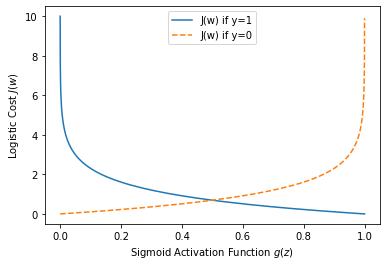

In [3]:
def sig(x):
    return 1/(1+np.exp(-x))

def cost_1(z):
    return -np.log(sig(z))

def cost_0(z):
    return -np.log(1-sig(z))

z = np.arange(-10, 10, 0.1)

phi_z = sig(z)
c1 = cost_1(z)
c0 = cost_0(z)

pyplot.plot(phi_z, c1, phi_z, c0, '--')
pyplot.legend(['J(w) if y=1', 'J(w) if y=0'])
pyplot.xlabel('Sigmoid Activation Function $g(z)$')
pyplot.ylabel('Logistic Cost $J(w)$')
pyplot.show()

Cost approaches 0 if we correctly predict the class. If we are wrong, it goes to infinity.

## First example: Iris dataset

In [4]:
data = datasets.load_iris()

In [5]:
print(data['DESCR'][:482] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
...


In [6]:
print(data.data.shape)
#print(data.data)

(150, 4)


In [7]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
iris_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0.0
98,5.1,2.5,3.0,1.1,1.0
75,6.6,3.0,4.4,1.4,1.0
16,5.4,3.9,1.3,0.4,0.0
131,7.9,3.8,6.4,2.0,2.0


In [11]:
iris_df[iris_df['target']==0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [12]:
iris_df[iris_df['target']==1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [13]:
iris_df[iris_df['target']==2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


<AxesSubplot:>

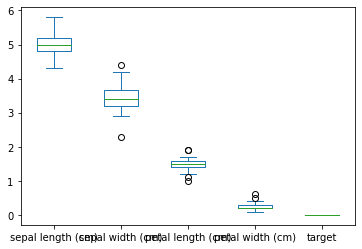

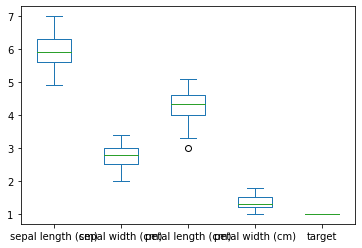

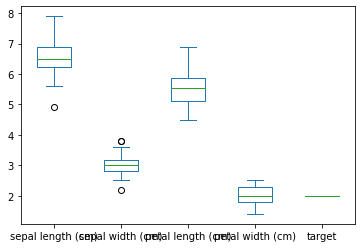

In [14]:
iris_df[iris_df['target']==0].plot.box()   #setosa
iris_df[iris_df['target']==1].plot.box()   #versicolor
iris_df[iris_df['target']==2].plot.box()   #virginica

From the description plots above, we can see that Class=0 is characteristically much different than Class=1 and Class=2. It is the only class where petal length is lower than sepal width.

Scatter plots below verify this observation as well.

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

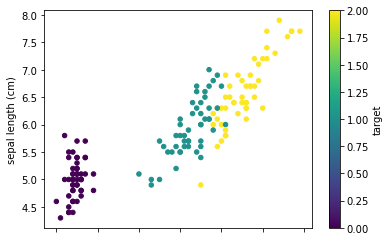

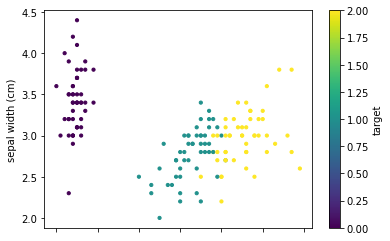

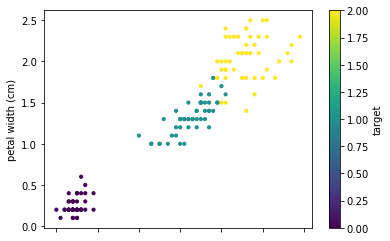

In [15]:
iris_df.plot.scatter(x='petal length (cm)',y='sepal length (cm)',s=20,c='target',colormap='viridis')
iris_df.plot.scatter(x='petal length (cm)',y='sepal width (cm)',s=10,c='target',colormap='viridis')
iris_df.plot.scatter(x='petal length (cm)',y='petal width (cm)',s=10,c='target',colormap='viridis')
#iris_df.plot.scatter(x='petal width (cm)',y='sepal length (cm)',s=10,c='target',colormap='viridis')
#iris_df.plot.scatter(x='petal width (cm)',y='sepal width (cm)',s=10,c='target',colormap='viridis')
#iris_df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',s=10,c='target',colormap='viridis')
#help(iris_df.plot.scatter)

In [16]:
# Make the data sets, train/test/validate
# For the moment, we will only have train and validation. We will evaluate the model on validation set.
# Remember we shuffled the dataset, so it is safe to take first 100 as training set.
train_df = iris_df.iloc[0:100]
val_df = iris_df.iloc[100:150]
#test_df = iris_df.iloc[125:150]

Now, when applying Logistic Regression, pay attention to the parameter $C$. It is 'Inverse of regularization strength' with default value 1.0.

In [17]:
# lr_orig = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=100, multi_class='auto')
# l2 is the choice of regularization term, C is the inverse of regularization strength
lr_orig = LogisticRegression(C=1.0)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])
#help(train_df.drop)
#help(lr_orig)

LogisticRegression()

#### Look in the documentation before using the models:

class sklearn.linear_model.LogisticRegression(  
penalty='l2',      
dual=False,   
tol=0.0001,   
C=1.0,   
fit_intercept=True,   
intercept_scaling=1,   
class_weight=None,   
random_state=None,   
solver='lbfgs',   
max_iter=100,   
multi_class='auto',   
verbose=0,   
warm_start=False,   
n_jobs=None,  
l1_ratio=None  
)

In [18]:
print(sum(lr_orig.predict(train_df.drop('target', axis=1))==train_df['target']), "/",len(train_df['target']))
print(sum(lr_orig.predict(val_df.drop('target', axis=1))==val_df['target']), "/", len(val_df['target']))

97 / 100
48 / 50


# Regularization
LogisticRegression() supports $L1$ and $L2$ regularization.

Recall the original cross-entropy loss:

$$
J(w)=\sum{[-y^{(i)}log(g(z^{(i)}))-(1-y^{(i)})log(1-g(z^{(i)})]}
$$

Adding $L2$:

$$
J(w)=\sum{[-y^{(i)}log(g(z^{(i)}))-(1-y^{(i)})log(1-g(z^{(i)})]}+\lambda ||w||^2
$$

In the above, increasing $\lambda$ increasing the penalty for larger weights and will shrink our coefficient estimates.

### scikit-learn Implements this using the inverse of $\lambda$, smaller $C$ increases Regularization!

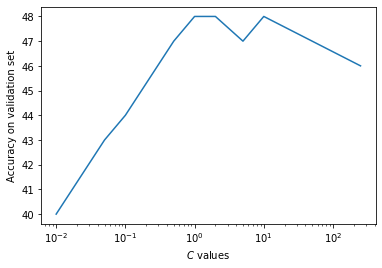

In [19]:
cvals = [0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10, 50, 250]
results = np.zeros(10)
index=0
for cv in cvals:
    lr = LogisticRegression(penalty='l2', C=cv, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
    lr.fit(train_df.drop(['target'], axis=1),train_df['target'])
    u=sum(lr.predict(val_df.drop('target', axis=1))==val_df['target'])
    results[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(cvals, results)
#help(pyplot.xscale)
pyplot.xscale('log')
pyplot.xlabel('$C$ values')
pyplot.ylabel('Accuracy on validation set')
pyplot.show()

Deciding on the best $C$ value is not easy. It is a hyperparameter. Using test data to see that is not proper. We should **not** see the test data until final performance evaluation. To choose hyperparameters ($C$, model complexity etc.), we spare a separate section of the data as **validation set**. We'll elaborate this more in an upcoming lecture.

## A New Example Where Linear Boundary is insufficient

In [20]:
help(datasets.make_moons)

Help on function make_moons in module sklearn.datasets._samples_generator:

make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles.
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, the total number of points generated.
        If two-element tuple, number of points in each of two moons.
    
        .. versionchanged:: 0.23
           Added two-element tuple.
    
    shuffle : bool, default=True
        Whether to shuffle the samples.
    
    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible o

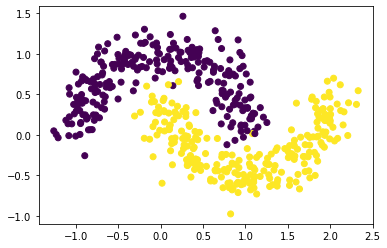

In [21]:
d=datasets.make_moons(n_samples=500, noise=0.15)  #try noise=None
pyplot.scatter(x=d[0][::,0],y=d[0][::,1],c=d[1])


In [22]:
X = d[0]
y = d[1]
X_train = X[0:300, :]
y_train = y[0:300]
X_val = X[300:, :]
y_val = y[300:]
print(X_val.shape)
print(X_train.shape)
print(y_train.shape)

#pyplot.scatter(x=X_train[:,0],y=X_train[:,1], c=y_train)

(200, 2)
(300, 2)
(300,)


In [23]:
lr = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=100, multi_class='auto')
#lr = LogisticRegression()
lr.fit(X_train, y_train)
#help(lr)

LogisticRegression()

In [24]:
lr.score(X_val, y_val)

0.825

Let's see how the estimated boundary looks like.

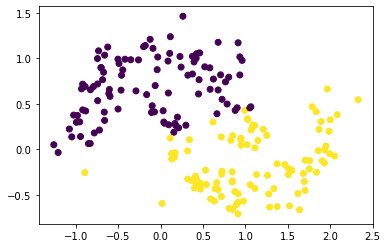

In [25]:
pyplot.scatter(x=X_val[:,0],y=X_val[:,1], c=lr.predict(X_val))

With only two features, Logistic Regression is able to fit only linear boundaries. Not surprisingly it does not perform well, because classes are not linearly separable.

We write a method that increases the number of features from 2 to 10. First it adds three new features, namely $x^2$, $x\cdot y$ and $y^2$.
Last 5 features are sinusoids of first 5 features, i.e. $sin(x)$, $sin(y)$, $sin(x^2)$, $sin(x\cdot y)$ and $sin(y^2)$. These features help Logistic Regression to fit a non-linear boundary.

In [26]:
def addFeatures(X_orig, X_new):
  for row in range(X_orig.shape[0]):
    
    #First two features are just copies of the original two features 
    col = 0
  
    X_new[row, col] = X_orig[row, col]
    col += 1
  
    X_new[row, col] = X_orig[row, col]
    col += 1
    
    #Now we crate new features that do not exist in the original data
    
    X_new[row, col] = X_orig[row, 0]*X_orig[row, 0]
    col += 1
    
    X_new[row, col] = X_orig[row, 0]*X_orig[row, 1]
    col += 1
    
    X_new[row, col] = X_orig[row, 1]*X_orig[row, 1]
    col += 1
    
    num_cur_features = col
    for j in range(num_cur_features):
      X_new[row, col] = np.sin(X_new[row, j])
      col += 1

In [27]:
X_train_p = np.zeros((X_train.shape[0], 10))
X_val_p = np.zeros((X_val.shape[0], 10))
print(X_train_p.shape)
print(X_val_p.shape)

(300, 10)
(200, 10)


In [28]:
addFeatures(X_train, X_train_p)
addFeatures(X_val, X_val_p)
print(X_train_p.shape)
print(X_val_p.shape)

(300, 10)
(200, 10)


In [29]:
lr = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
lr.fit(X_train_p, y_train)

LogisticRegression(max_iter=500)

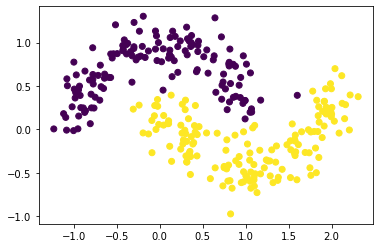

In [30]:
pyplot.scatter(x=X_train_p[:,0], y=X_train_p[:,1], c=lr.predict(X_train_p))

What about the performance on the validation data?

In [31]:
lr.score(X_val_p, y_val)

0.935

Note the improved performance with extra features. Lets plot the predicted classes on validation data.

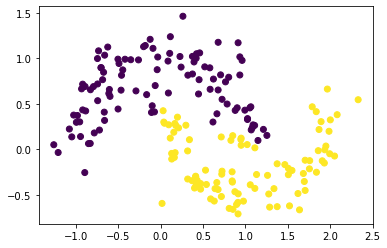

In [32]:
pyplot.scatter(x=X_val_p[:,0], y=X_val_p[:,1], c=lr.predict(X_val_p))

# Homework 2: Due 25 June 2022, 11:59 PM

Q1) Regarding our Logistic Regression model on Iris dataset. 

a) Which target class was misclassified the most? What was it mostly classified as?

b) Write a function which creates a 3 by 3 table such that:
  - row $i$ column $j$ shows the number of elements of type $i$ that were classified as type $j$.
  - note the diagonal is the count of correctly classified elements.
  - this matrix is known as 'confusion matrix' 


<AxesSubplot:>

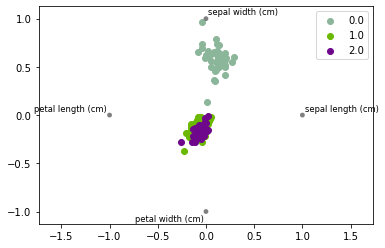

In [121]:
from pandas.plotting import radviz
radviz(iris_df, "target")

### a)it is defined that target=0 is setosa,target=1 is versicloar and target=2 is virginica
### from the iris dataset it is observed that versicolar target class is mostly misclassified as virginica target class.

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [123]:
# Seperating the data into dependent and independent variables
X0 = iris_df.iloc[:, :-1].values
y0 = iris_df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size = 0.33, random_state = 0)

In [124]:

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       0.92      0.86      0.89        14
         2.0       0.90      0.95      0.92        19

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

[[17  0  0]
 [ 0 12  2]
 [ 0  1 18]]


C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Q2) Try creating new features to the Iris Dataset by multiplying/squaring various current features together. (e.g. area = length*width)

Can we increase the performance on the test set? I believe we can. Please come up with a better performing set of features. Compare the performance with lr.score.

Important: Keep test size 33% of the original data, which corresponds to 50 samples.

In [125]:
x=iris_df.drop(['target'],axis=1)
y=iris_df["target"]

##### caluculating the logistic regression score for the iris data set

In [126]:
classifier.fit(x,y)
classifier.score(x,y)

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

##### the logistic regrssion score with the actual features is 0.9733..

now adding the new feautres by squaring the original x and y features

In [127]:
x_add=x*x
y_add=y*y

In [128]:
classifier.fit(x_add,y_add)
classifier.score(x_add,y_add)

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9866666666666667

aftre squaring the original feaatures the logistic regression score is increased compared to the original features

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x_add, y_add, test_size = 0.33, random_state = 0)

In [130]:
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       0.92      0.86      0.89        14
         4.0       0.90      0.95      0.92        19

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

[[17  0  0]
 [ 0 12  2]
 [ 0  1 18]]


C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### by adding the features it is observed that the precision and confusion matrix of the iris dataset are changed

In [131]:
import math

now creating the new feature by multiplying the x four times and keeping the y as same

In [132]:
x1_add=x*x*x*x
y1_add=y

In [133]:
classifier.fit(x1_add,y1_add)
classifier.score(x1_add,y1_add)

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333333

it is obeserved that the logistic regression score is increased by multiplying the x with four times and keeping the y as same.hence it is observed that the performance of the iris data set is increased by changing the features

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x1_add, y1_add, test_size = 0.33, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      0.93      0.96        14
         2.0       0.95      1.00      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[17  0  0]
 [ 0 13  1]
 [ 0  0 19]]


C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
x2_add=x
y2_add=y*y
classifier.fit(x2_add,y2_add)
classifier.score(x2_add,y2_add)

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

###### i tried creating new features to the iris dataset by squaring the features and by multiplying the features fours with themselves. i observed that there is an increase in the performance on the test set by creating the new features.i compared the performance using the logistic regression score value.without adding any features the lr.score for iris dataset is 0.97 but after squaring the features the lr.score value is 0.98 and by multiplying the features four times with themselevs the lr.score became 0.99.hence it is obeserved that the performance is increased.

### refernces:
https://www.kaggle.com/code/sixteenpython/machine-learning-with-iris-dataset/notebook